In [73]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [74]:
dom = np.linspace(0.1,1.1,100)
f = lambda x: np.sqrt(np.tan(x))

In [75]:
def ProgDerivative(x,f,h):
    return ( -3*f(x) + 4*f(x+h) - f(x+2*h) )/ (2*h)

def CentralDerivative(x,f,h):
    return (f(x+h)-f(x-h))/(2*h)

In [76]:
x = sym.Symbol("x",Real=True)
sf = sym.sqrt(sym.tan(x))
dfdx = sym.lambdify([x], sym.simplify(sym.diff(sf,x)), "numpy")

analit = dfdx(dom)
prog = ProgDerivative(dom,f,0.01)
central = CentralDerivative(dom,f,0.01)

In [77]:
#Función
sf

sqrt(tan(x))

In [78]:
#Derivada simbólica/analítica
sym.simplify(sym.diff(sf,x))

1/(2*cos(x)**2*sqrt(tan(x)))

<IPython.core.display.Javascript object>


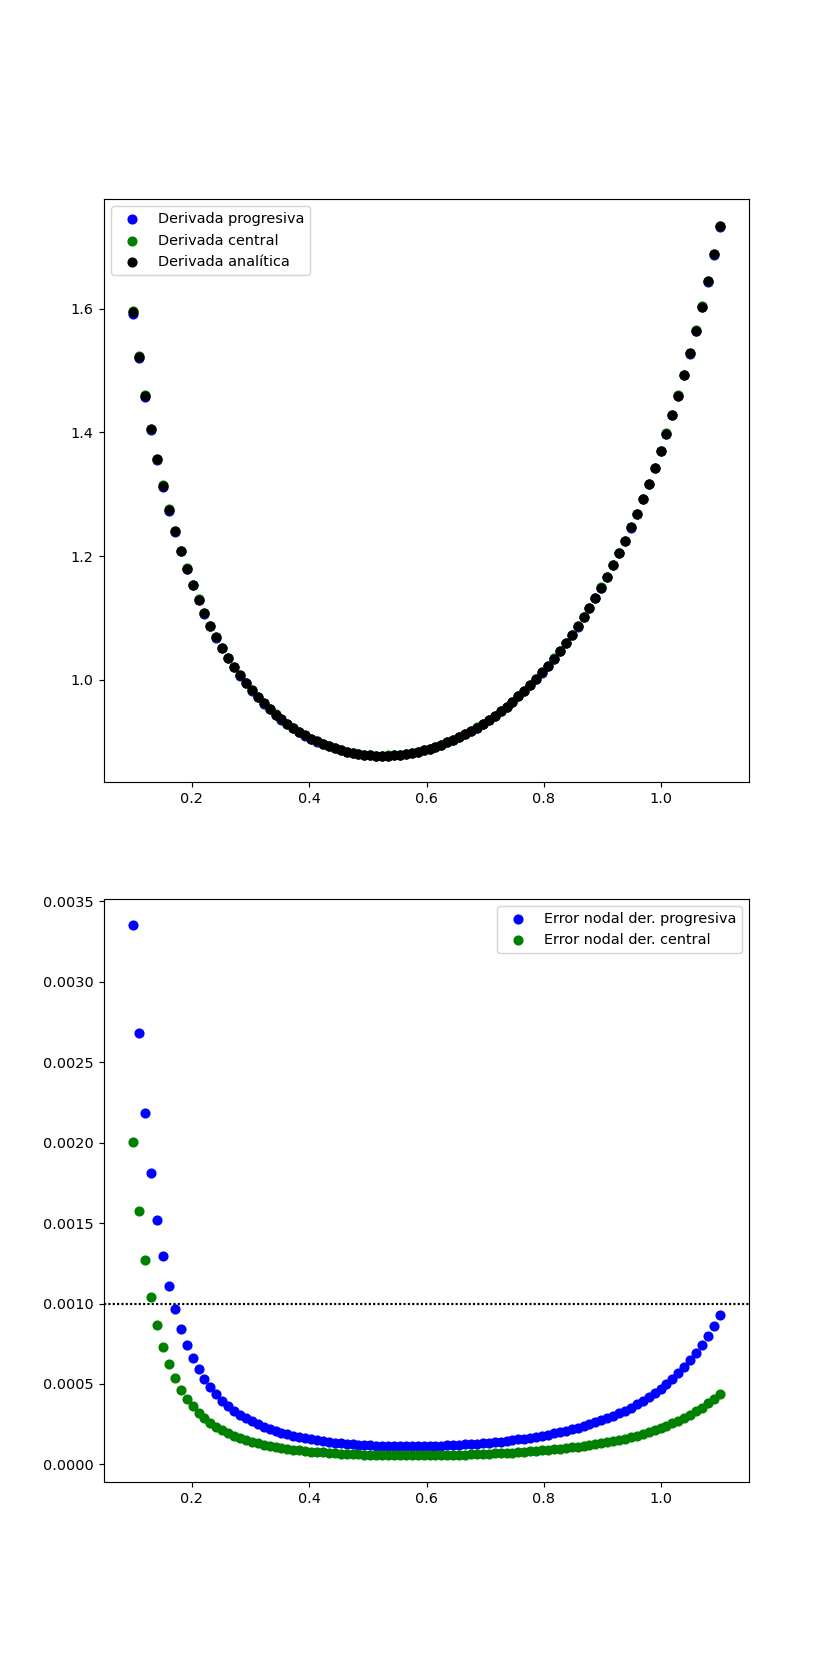

In [79]:
fig = plt.figure(figsize=(8,16))
ax = fig.add_subplot(2,1,1)
ax1 = fig.add_subplot(2,1,2)
ax.scatter(dom, prog, color="#0000FF",label="Derivada progresiva")
ax.scatter(dom, central, color="#008000",label="Derivada central")
ax.scatter(dom, analit, color="#000000",label="Derivada analítica")
ax.legend()

ax1.scatter(dom, np.abs(prog-analit), color="#0000FF",label="Error nodal der. progresiva")
ax1.scatter(dom, np.abs(central-analit), color="#008000",label="Error nodal der. central")
ax1.axhline(y=0.0010,linestyle=(0, (1, 1)),color='#000000')
ax1.legend()

Es posible apreciar que, a pesar de que hay algunos datos del orden $ 10^{-3} $ en el intervalo $ [0.1, 0.2) $ aproximadamente, la gran mayoría de errores nodales son del orden $ 10^{-4} $ para ambos métodos de derivación. Esto es consistente con el orden de ambos métodos, el cual es de $ O(h^2) $. 